In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv("kddcup99_csv.csv")

In [4]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal


In [5]:
df.shape

(494020, 42)

In [6]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494020.000000,4.940200e+05,4.940200e+05,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,...,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000
mean,47.979400,3.025616e+03,8.685308e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148245,0.010212,...,232.471248,188.666052,0.753781,0.030906,0.601936,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.747185,9.882191e+05,3.304003e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355343,1.798328,...,64.744601,106.040205,0.410780,0.109259,0.481309,0.042133,0.380593,0.380920,0.230590,0.230141
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Separate input and output values

In [7]:
x= list(df.columns)[1:-1]
y= list(df.label)
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()[:-1]

In [8]:
x

['protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'lnum_compromised',
 'lroot_shell',
 'lsu_attempted',
 'lnum_root',
 'lnum_file_creations',
 'lnum_shells',
 'lnum_access_files',
 'lnum_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate']

In [9]:
y

['normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[numeric_cols])
df[numeric_cols] = scaler.transform(df[numeric_cols])

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

target = df['label']
df['label'] = le.fit_transform(target)
df['protocol_type'] = le.fit_transform(df['protocol_type'])
df['service'] = le.fit_transform(df['service'])
df['flag'] = le.fit_transform(df['flag'])

In [12]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0.0,1,22,9,2.610418e-07,0.001057,0.0,0.0,0.0,0.0,...,0.035294,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,11
1,0.0,1,22,9,3.446905e-07,0.000094,0.0,0.0,0.0,0.0,...,0.074510,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,11
2,0.0,1,22,9,3.389216e-07,0.000259,0.0,0.0,0.0,0.0,...,0.113725,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,11
3,0.0,1,22,9,3.158461e-07,0.000259,0.0,0.0,0.0,0.0,...,0.152941,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,11
4,0.0,1,22,9,3.129617e-07,0.000394,0.0,0.0,0.0,0.0,...,0.192157,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,0.0,1,22,9,4.470881e-07,0.000365,0.0,0.0,0.0,0.0,...,1.000000,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,11
494016,0.0,1,22,9,4.067060e-07,0.000443,0.0,0.0,0.0,0.0,...,1.000000,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,11
494017,0.0,1,22,9,2.927706e-07,0.000233,0.0,0.0,0.0,0.0,...,1.000000,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,11
494018,0.0,1,22,9,4.196859e-07,0.000233,0.0,0.0,0.0,0.0,...,1.000000,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,11


<AxesSubplot:>

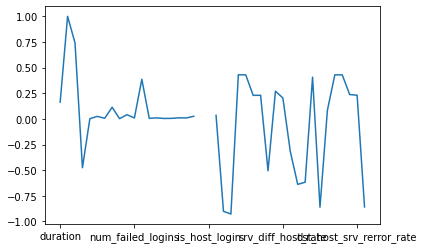

In [13]:
df.corr()['protocol_type'].plot()

<AxesSubplot:>

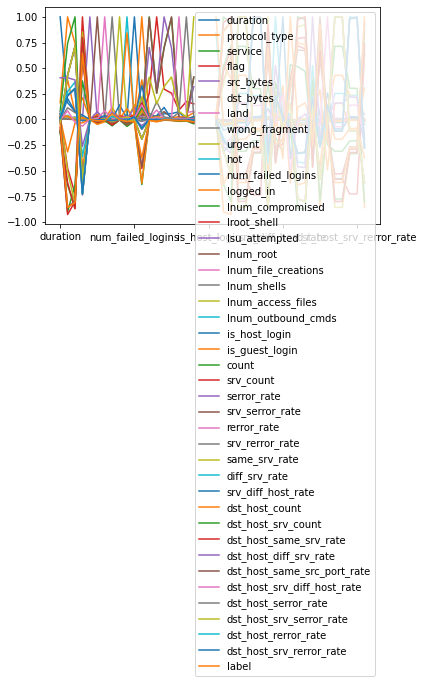

In [14]:
df.corr().plot()

In [14]:
X= df.drop(columns="label")
Y= df.label

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X,Y,random_state=0)

## Random forest

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
rf= RandomForestClassifier(n_estimators=100)

In [20]:
rf.fit(x_train, y_train)

RandomForestClassifier()

In [21]:
rf.score(x_test, y_test)

0.9996761264726124

In [22]:
rf.predict(x_test)

array([11, 11, 18, ..., 18, 18, 11])

## SVM

In [24]:
from sklearn.svm import SVC

In [25]:
svc= SVC(kernel='linear')

In [26]:
svc.fit(x_train, y_train)

SVC(kernel='linear')

In [27]:
svc.score(x_test, y_test)

0.999012185741468

In [28]:
svc.predict(x_test)

array([11, 11, 18, ..., 18, 18, 11])

## XGBoost

In [29]:
from xgboost import XGBClassifier

In [30]:
xg_model= XGBClassifier()

In [31]:
xg_model.fit(x_train, y_train)

C:\Users\PRASOON\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:17:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [32]:
xg_model.score(x_test, y_test)

0.9997894822071981

In [33]:
xg_model.predict(x_test)

array([11, 11, 18, ..., 18, 18, 11])